In [47]:
#Importing Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set()  # For plot styling

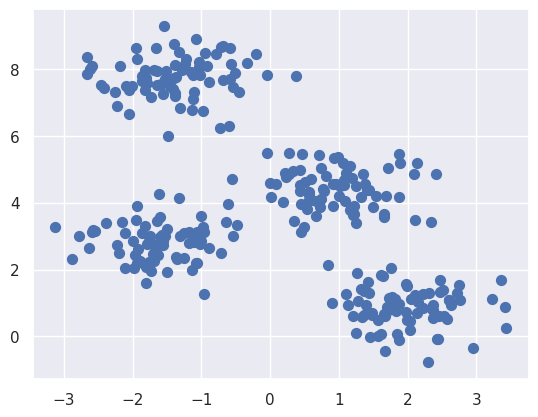

In [48]:
#Generating Sample Data
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

plt.scatter(X[:, 0], X[:, 1], s=50)
plt.show()

In [49]:
#Performing K-Means Clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

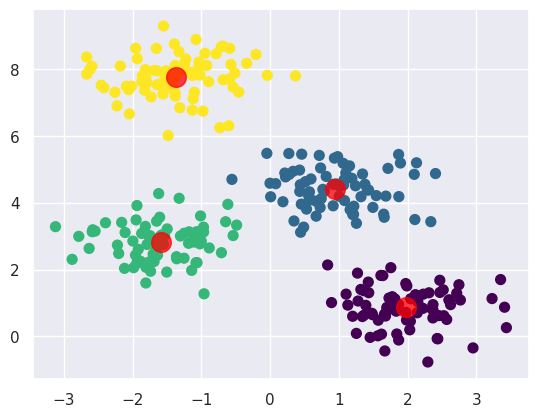

In [50]:
#Visualizing the Clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.show()

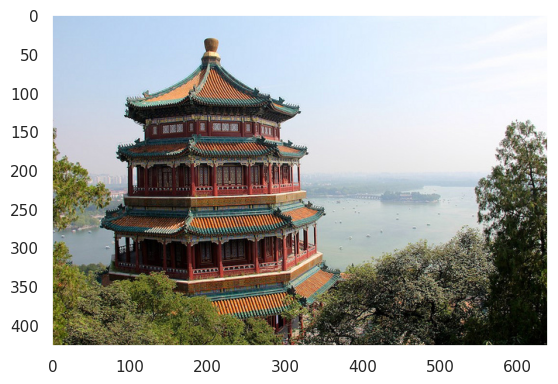

In [51]:
#Loading and Displaying the Sample Image
from sklearn.datasets import load_sample_image

china = load_sample_image("china.jpg")
plt.imshow(china)
plt.grid(False)
plt.show()

In [52]:
#Normalizing and Reshaping the Image Data
data = china / 255.0  # Normalizing the data to the range [0, 1]
data = data.reshape(-1, 3)  # Reshaping to a (num_pixels, 3) array

In [53]:
#Plotting the Pixels Function
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))

    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green')

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue')

    plt.suptitle(title, size=20)
    plt.show()

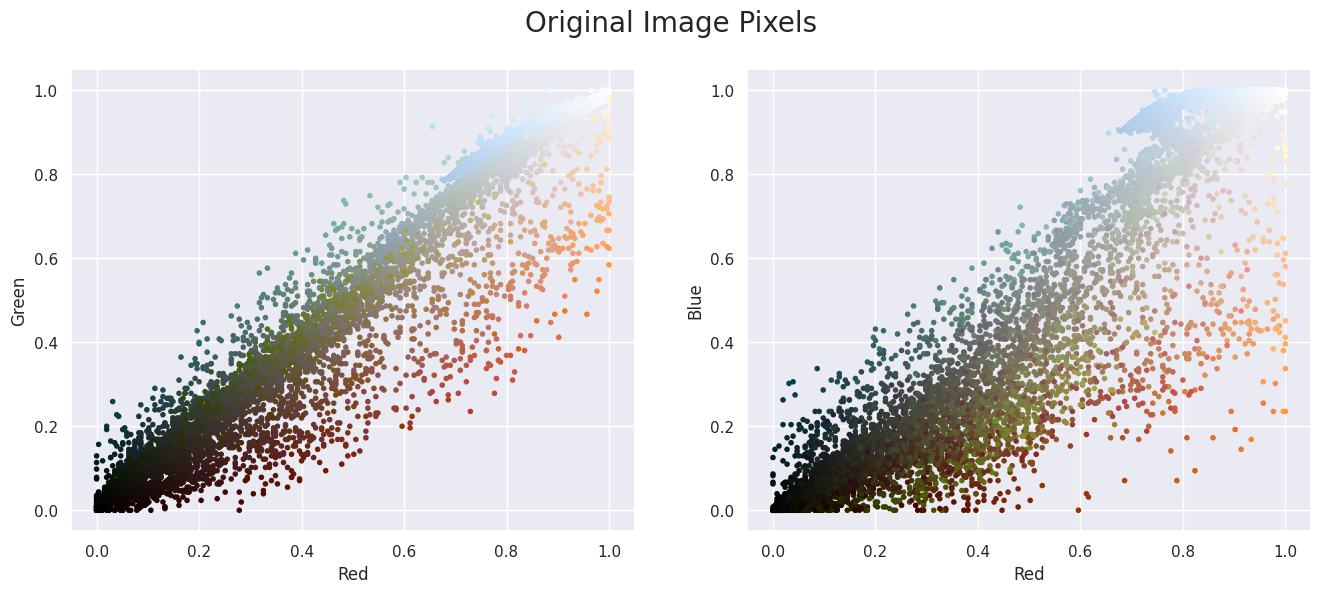

In [55]:
#Applying the Plotting Function
plot_pixels(data, title="Original Image Pixels")

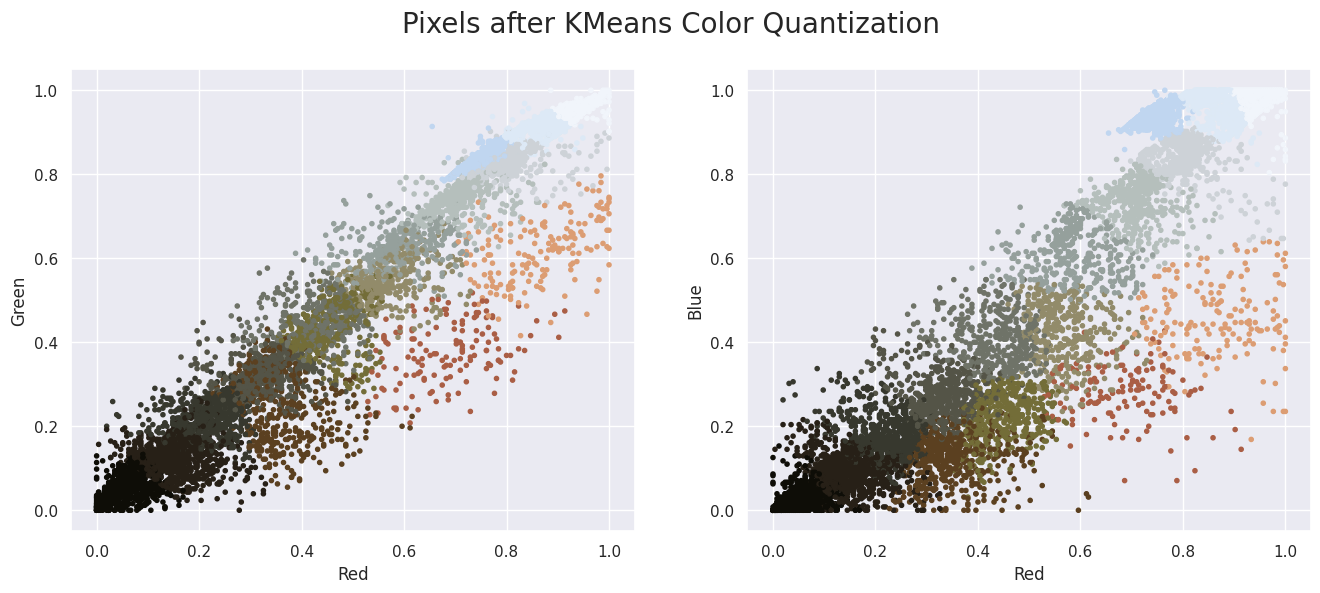

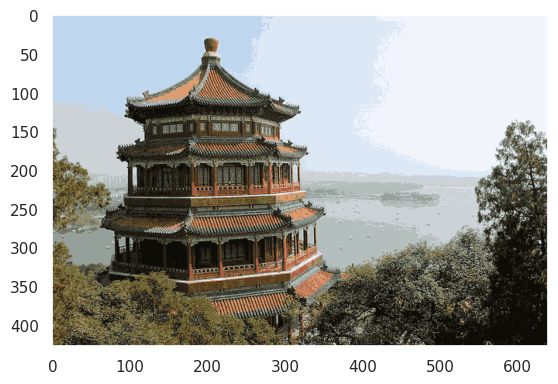

In [56]:
#K-Means on the Image Data
kmeans = KMeans(n_clusters=16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors, title="Pixels after KMeans Color Quantization")

china_recolored = new_colors.reshape(china.shape)
plt.imshow(china_recolored)
plt.grid(False)
plt.show()